<a href="https://colab.research.google.com/github/Deyonrose/computer_vision/blob/main/2348513_cv_exta_prg3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/Cartoon_Pixar_Sally_LightningMcQueen.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

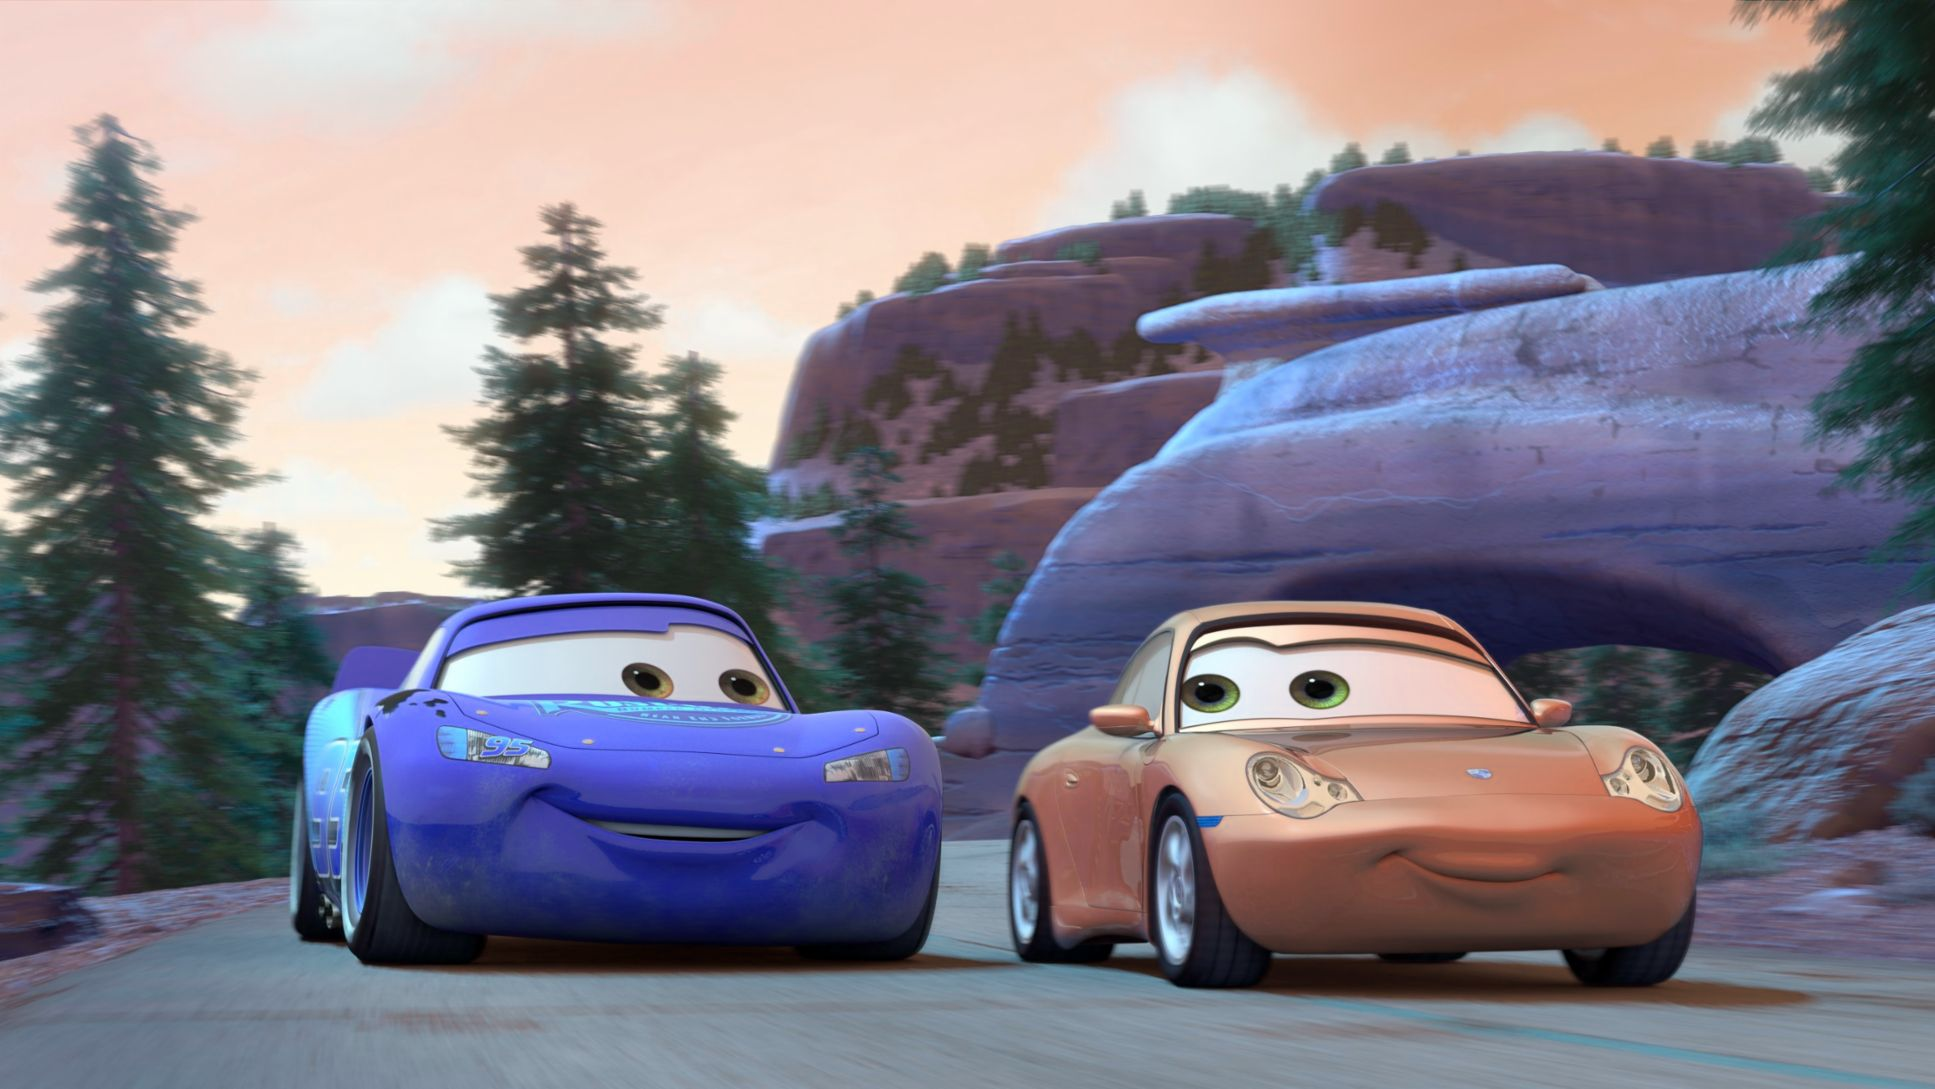

In [5]:
cv2_imshow(img)

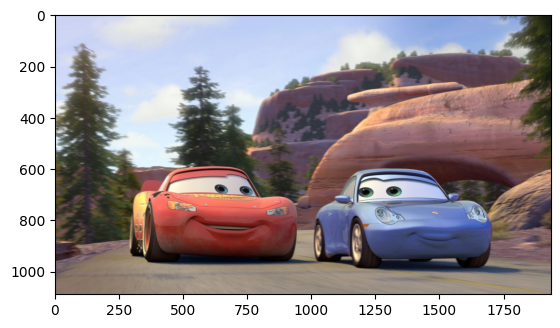

In [6]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [7]:
print(img.shape[0])
print(img.shape[1])

1089
1935


In [8]:
def rescale_area_interpolation(frames, scale=0.7):
    fr_width = int(frames.shape[1] * scale)
    fr_height = int(frames.shape[0] * scale)
    dimensions = (fr_width, fr_height)
    return cv2.resize(frames, dimensions, interpolation=cv2.INTER_AREA)

def rescale_cubic_interpolation(frames, scale=0.7):
    fr_width = int(frames.shape[1] * scale)
    fr_height = int(frames.shape[0] * scale)
    dimensions = (fr_width, fr_height)  #
    return cv2.resize(frames, dimensions, interpolation=cv2.INTER_CUBIC)
def rescale_linear_interpolation(frames, scale=0.7):
    fr_width = int(frames.shape[1] * scale)
    fr_height = int(frames.shape[0] * scale)
    dimensions = (fr_width, fr_height)
    return cv2.resize(frames, dimensions, interpolation=cv2.INTER_LINEAR)

def rescale_nearest_interpolation(frames, scale=0.7):
    fr_width = int(frames.shape[1] * scale)
    fr_height = int(frames.shape[0] * scale)
    dimensions = (fr_width, fr_height)
    return cv2.resize(frames, dimensions, interpolation=cv2.INTER_NEAREST)

def lanczos_interpolation(frames,scale=0.7):
    fr_width = int(frames.shape[1] * scale)
    fr_height = int(frames.shape[0] * scale)
    dimensions = (fr_width,fr_height)
    return cv2.resize(frames,dimensions,interpolation=cv2.INTER_LANCZOS4)



In [9]:
img_area = rescale_area_interpolation(img,scale=0.5)
img_cubic = rescale_cubic_interpolation(img,scale=0.5)
img_linear = rescale_linear_interpolation(img,scale=0.5)
img_nearest = rescale_nearest_interpolation(img,scale=0.5)
img_lanczo = lanczos_interpolation(img,scale=0.5)

<Figure size 2000x2000 with 0 Axes>

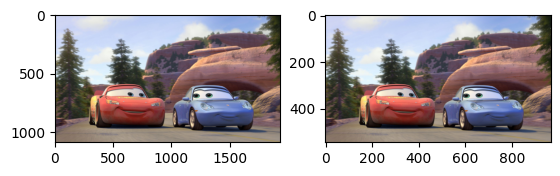

In [10]:
from matplotlib import pyplot as plt
## Linear interpolation
plt.figure(figsize=(20,20))
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(img)
ax2.imshow(img_linear)
# plt.axis('off')
plt.show()

<Figure size 1000x600 with 0 Axes>

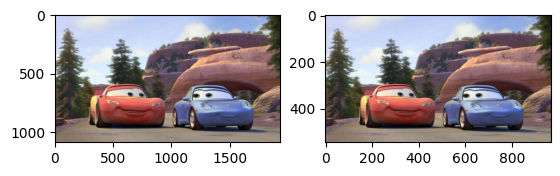

In [11]:
## Area interpolation
plt.figure(figsize=(10,6))
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(img)
ax2.imshow(img_area)
# plt.axis('off')
plt.show()

<Figure size 1000x600 with 0 Axes>

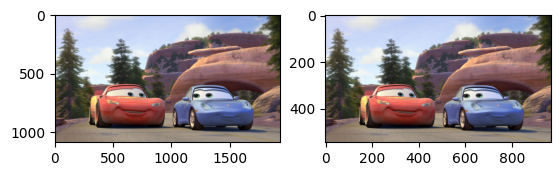

In [12]:
## Nearest interpolation
plt.figure(figsize=(10,6))
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(img)
ax2.imshow(img_nearest)
# plt.axis('off')
plt.show()

<Figure size 1000x600 with 0 Axes>

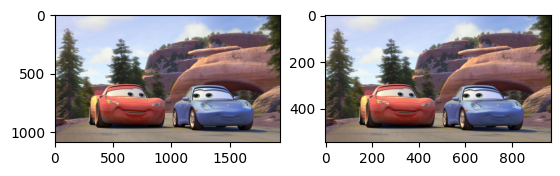

In [13]:
## cubic interpolation
plt.figure(figsize=(10,6))
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(img)
ax2.imshow(img_cubic)
# plt.axis('off')
plt.show()

<Figure size 1000x600 with 0 Axes>

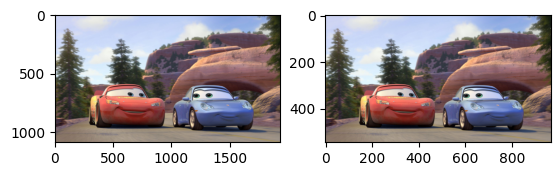

In [14]:
## lanczos interpolation
plt.figure(figsize=(10,6))
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(img)
ax2.imshow(img_lanczo)
# plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


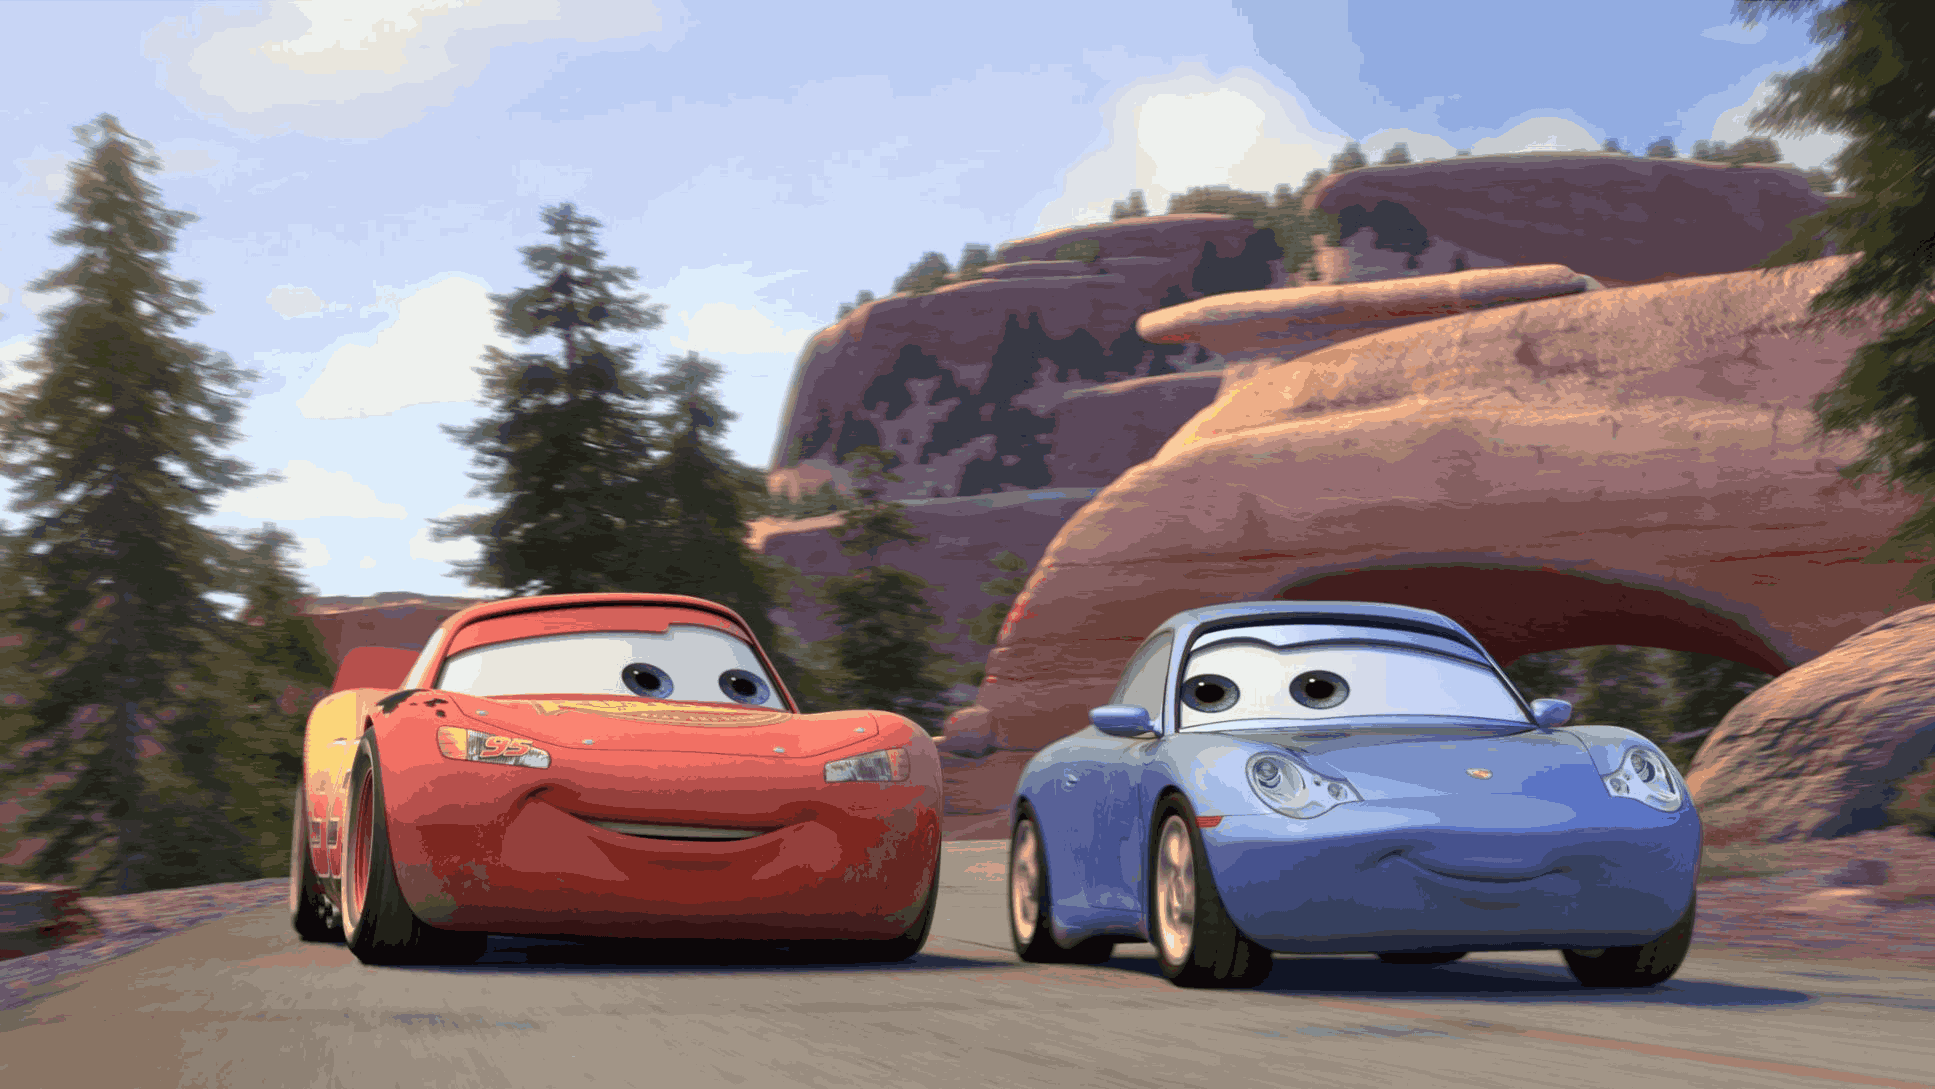

In [16]:
import cv2
import numpy as np
from sklearn.cluster import MiniBatchKMeans


input_image = cv2.imread('/content/Cartoon_Pixar_Sally_LightningMcQueen.jpg')

# Define the number of clusters
num_clusters = 64

# Quantize the colors using k-means clustering
kmeans = MiniBatchKMeans(n_clusters=num_clusters)
pixels = input_image.reshape(-1, 3)
kmeans.fit(pixels)
quantized_pixels = kmeans.cluster_centers_.astype(np.uint8)
quantized_image = quantized_pixels[kmeans.labels_].reshape(input_image.shape)

# Save the quantized image
cv2_imshow( quantized_image)